In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#import file
df = pd.read_csv("insurance_data.csv", delimiter=";")

# EDA
- Analyzing the data and the type of values in each column along with the frequency
- Helps to identify any preprocessing that needs to be done and how the data is structured
- Gives insight to what the dataset is about

In [3]:
df.head(20)

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y
5,6,M,1.0,No,No,3,Yes,Yes,Class A,2,1.0,Yes,"81,35","233,7",N
6,7,F,0.0,No,Yes,24,Yes,No,No,NaN,3.0,No,"21,05","531,55",Y
7,8,M,0.0,No,No,24,Yes,No,Class A,2,1.0,Yes,"85,95","2107,15",Y
8,9,F,0.0,No,No,24,Yes,No,Class B,1,1.0,No,"56,35","1381,2",Y
9,10,F,1.0,No,No,31,Yes,Yes,Class A,"2,3,4",1.0,Yes,"99,95","3186,65",N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   object 
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   object 
 4   hasKids                   5500 non-null   object 
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   object 
 7   multipleTermLifePolicies  5500 non-null   object 
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   object 
 12  monthlyPremium            5500 non-null   object 
 13  totalPremium              5500 non-null   object 
 14  renewal 

In [5]:
#number of unique insuree
df["insuree#"].nunique()

5500

In [6]:
df["eStatements"].value_counts()

Yes    3225
No     2275
Name: eStatements, dtype: int64

In [7]:
df["premiumFrequency"].value_counts()

1.0     2959
12.0    1308
3.0     1119
Name: premiumFrequency, dtype: int64

In [8]:
df["multipleTermLifePolicies"].value_counts()

No                            2654
Yes                           2315
no term life policy taken      497
term life policy not taken      34
Name: multipleTermLifePolicies, dtype: int64

In [9]:
df["gender"].value_counts()

M    2719
F    2668
Name: gender, dtype: int64

In [10]:
df["healthRiders"].value_counts()

3,4        474
2,3,4      434
1,2,3,4    374
2          304
1          277
1,2        247
3          238
4          232
1,3,4      228
2,3        139
2,4        133
1,2,4      131
1,2,3      126
1,4         95
1,3         86
Name: healthRiders, dtype: int64

In [11]:
df["healthInsurance"].value_counts()

Class A    2419
Class B    1872
No         1209
Name: healthInsurance, dtype: int64

In [12]:
df["renewal"].value_counts()

Y    4023
N    1477
Name: renewal, dtype: int64

In [13]:
df["totalPremium"].value_counts()

20,2       10
            9
19,75       9
19,9        6
19,55       6
           ..
80,95       1
3371        1
6548,65     1
1978,65     1
58          1
Name: totalPremium, Length: 5174, dtype: int64

In [14]:
df["monthlyPremium"].value_counts()

20,05    49
19,95    35
20       34
19,6     34
19,7     34
         ..
62,1      1
23,6      1
31        1
43,25     1
83,95     1
Name: monthlyPremium, Length: 1524, dtype: int64

In [15]:
df[df['premiumFrequency'].isnull()]

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
20,21,F,1.0,No,No,4,Yes,Yes,Class A,NaN,NaN,Yes,"74,45","294,45",Y
87,88,M,0.0,No,No,39,Yes,No,Class A,"1,3,4",NaN,Yes,"100,45","3801,7",Y
90,91,F,0.0,Yes,Yes,9,Yes,No,Class B,"1,2",NaN,No,65,"663,05",N
308,309,M,0.0,No,No,13,Yes,No,Class A,1,NaN,Yes,"73,75","956,65",Y
320,321,M,0.0,Yes,Yes,39,Yes,No,Class A,"2,3",NaN,Yes,"86,3",3266,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,5411,M,0.0,Yes,No,40,Yes,No,Class B,2,NaN,Yes,"50,15","2058,5",Y
5418,5419,F,0.0,Yes,No,59,Yes,Yes,Class B,"2,3,4",NaN,Yes,"80,1","4693,2",Y
5433,5434,F,0.0,Yes,Yes,55,Yes,No,Class B,"1,2",NaN,No,"55,7","3131,8",Y
5449,5450,F,1.0,Yes,No,19,Yes,Yes,Class A,"3,4",NaN,Yes,"94,95","1760,25",Y


### EDA Data Preprocessing 
- Change variables so that it can be intepreted easier
- Fix wrong datatypes

In [16]:
#create functions to convert strings into numbers

def getDummyGender(x):
    if x == "F":
        return 1
    elif x == "M": 
        return 0

In [17]:
def getDummyYesNo(x):
    if x == "Yes":
        return 1
    elif x == "No": 
        return 0

In [18]:
def getDummyRenewal(x):
    if x == "Y":
        return 1
    elif x == "N": 
        return 0

In [19]:
def getDummyMultipleTermLifePolicies(x):
    if x == "Yes":
        return 1
    elif x == "No": 
        return 0
    elif x == "no term life policy taken": 
        return 0
    elif x == "term life policy not taken": 
        return 0

In [20]:
#create a function to fix issue with total premium having blanks, assume 0 for blanks.
def getDummyTotalPremium(x):
    if x == " ":
        return "0" 
    else:
        return x

In [21]:
#apply functions to convert data into the numerical values

df["gender"] = df["gender"].apply(getDummyGender)

In [22]:
df["isMarried"] = df["isMarried"].apply(getDummyYesNo)
df["hasKids"] = df["hasKids"].apply(getDummyYesNo)
df["termLifeInsurance"] = df["termLifeInsurance"].apply(getDummyYesNo)
df["multipleTermLifePolicies"] = df["multipleTermLifePolicies"].apply(getDummyMultipleTermLifePolicies)
df["eStatements"] = df["eStatements"].apply(getDummyYesNo)
df["renewal"] = df["renewal"].apply(getDummyRenewal)
df["totalPremium"] = df["totalPremium"].apply(getDummyTotalPremium)

In [23]:
#make value types to float after correcting the structure of the data

df["monthlyPremium"] = df["monthlyPremium"].apply(lambda x: float(x.replace(',','.')))
df["totalPremium"] = df["totalPremium"].apply(lambda x: float(x.replace(',','.')))

In [24]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,1.0,0.0,1,1,23,1,0,No,NaN,12.0,1,19.65,451.55,1
1,2,1.0,1.0,0,0,42,1,1,Class A,3,1.0,1,84.65,3541.35,0
2,3,1.0,0.0,1,0,72,1,0,No,NaN,12.0,0,19.40,1496.45,1
3,4,1.0,0.0,1,1,13,1,0,No,NaN,12.0,0,19.55,265.30,1
4,5,1.0,0.0,0,0,37,1,1,Class A,"3,4",1.0,0,100.30,3541.40,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   float64
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   int64  
 4   hasKids                   5500 non-null   int64  
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   int64  
 7   multipleTermLifePolicies  5500 non-null   int64  
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   int64  
 12  monthlyPremium            5500 non-null   float64
 13  totalPremium              5500 non-null   float64
 14  renewal 

In [26]:
#Assume healthriders NaN means 0 (no policy)
df["healthRiders_1"] = 0
df["healthRiders_2"] = 0
df["healthRiders_3"] = 0
df["healthRiders_4"] = 0

In [27]:
df["healthRiders"]

0       NaN
1         3
2       NaN
3       NaN
4       3,4
       ... 
5495      4
5496    NaN
5497      4
5498    NaN
5499    NaN
Name: healthRiders, Length: 5500, dtype: object

In [28]:
#assign 1 if user has that type of health rider policy, else it remains as 0

for i in range(len(df)):
    if "1" in str(df["healthRiders"][i]):
        df["healthRiders_1"][i] = 1
    if "2" in str(df["healthRiders"][i]):
        df["healthRiders_2"][i] = 1
    if "3" in str(df["healthRiders"][i]):
        df["healthRiders_3"][i] = 1
    if "4" in str(df["healthRiders"][i]):
        df["healthRiders_4"][i] = 1

C:\Users\pokem\AppData\Local\Temp\ipykernel_8432\2902189771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["healthRiders_3"][i] = 1
C:\Users\pokem\AppData\Local\Temp\ipykernel_8432\2902189771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["healthRiders_4"][i] = 1
C:\Users\pokem\AppData\Local\Temp\ipykernel_8432\2902189771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["healthRiders_2"][i] = 1
C:\Users\pokem\AppD

In [29]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthRiders_1,healthRiders_2,healthRiders_3,healthRiders_4
0,1,1.0,0.0,1,1,23,1,0,No,NaN,12.0,1,19.65,451.55,1,0,0,0,0
1,2,1.0,1.0,0,0,42,1,1,Class A,3,1.0,1,84.65,3541.35,0,0,0,1,0
2,3,1.0,0.0,1,0,72,1,0,No,NaN,12.0,0,19.40,1496.45,1,0,0,0,0
3,4,1.0,0.0,1,1,13,1,0,No,NaN,12.0,0,19.55,265.30,1,0,0,0,0
4,5,1.0,0.0,0,0,37,1,1,Class A,"3,4",1.0,0,100.30,3541.40,1,0,0,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   float64
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   int64  
 4   hasKids                   5500 non-null   int64  
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   int64  
 7   multipleTermLifePolicies  5500 non-null   int64  
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   int64  
 12  monthlyPremium            5500 non-null   float64
 13  totalPremium              5500 non-null   float64
 14  renewal 

In [31]:
#drop columns not in used
df.drop(columns = "healthRiders", inplace=True)

In [32]:
#drop null values
df.dropna(inplace=True)

In [33]:
#health insurance no does not mean anything and can be interpreted by if a user has class A and class B health insurance
#hence it is dropped after one hot encoding

df = pd.get_dummies(df, columns=["healthInsurance"])
df.drop(columns = ["healthInsurance_No"], inplace=True)
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthRiders_1,healthRiders_2,healthRiders_3,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B
0,1,1.0,0.0,1,1,23,1,0,12.0,1,19.65,451.55,1,0,0,0,0,0,0
1,2,1.0,1.0,0,0,42,1,1,1.0,1,84.65,3541.35,0,0,0,1,0,1,0
2,3,1.0,0.0,1,0,72,1,0,12.0,0,19.40,1496.45,1,0,0,0,0,0,0
3,4,1.0,0.0,1,1,13,1,0,12.0,0,19.55,265.30,1,0,0,0,0,0,0
4,5,1.0,0.0,0,0,37,1,1,1.0,0,100.30,3541.40,1,0,0,1,1,1,0


In [34]:
#one hot encode premium frequency
df = pd.get_dummies(df, columns=["premiumFrequency"])

### EDA Analysis and Visuals 
- Analyzing patterns before building the model
- Create visuals and check for skewness

In [35]:
#What is the average number of riders health insurance customers purchase?
totalRiderHealthBought = df["healthRiders_1"].sum() + df["healthRiders_2"].sum() + df["healthRiders_3"].sum() + df["healthRiders_4"].sum()
averageNumberRiderInsuranceBought = totalRiderHealthBought/ df["insuree#"].count()
print("Average number of rider insurance bought:", averageNumberRiderInsuranceBought) 

Average number of rider insurance bought: 1.388030888030888


In [36]:
#Which health rider insurance is the most popular?
print("Number of health rider 1 insurance:", df["healthRiders_1"].sum()) 
print("Number of health rider 2 insurance:", df["healthRiders_2"].sum()) 
print("Number of health rider 3 insurance:", df["healthRiders_3"].sum()) 
print("Number of health rider 4 insurance:", df["healthRiders_4"].sum()) 

Number of health rider 1 insurance: 1466
Number of health rider 2 insurance: 1777
Number of health rider 3 insurance: 1969
Number of health rider 4 insurance: 1978


In [37]:
#What is the most popular rider for older people?
print("Number of health rider 1 insurance for older people:" ,df[df["is45OrOlder"] == 1]["healthRiders_1"].sum())
print("Number of health rider 2 insurance for older people:" ,df[df["is45OrOlder"] == 1]["healthRiders_2"].sum())
print("Number of health rider 3 insurance for older people:" ,df[df["is45OrOlder"] == 1]["healthRiders_3"].sum())

Number of health rider 1 insurance for older people: 206
Number of health rider 2 insurance for older people: 350
Number of health rider 3 insurance for older people: 414


In [38]:
#How many people who have kids have termLifeInsurance
print("Number of people who have kids:" , df[df["hasKids"] == 1]["hasKids"].count())
print("Number of people who have kids that have term life insurance:" ,df[df["hasKids"] == 1]["termLifeInsurance"].sum())

Number of people who have kids: 1548
Number of people who have kids that have term life insurance: 1395


In [39]:
#How many people renew for the different types of health insurance &  rider scheme
print("Number of people who renew for Class A:" ,df[(df["healthInsurance_Class A"] == 1) & (df["renewal"] == 1) ]["termLifeInsurance"].sum())
print("Number of people who renew for Class B:" ,df[(df["healthInsurance_Class B"] == 1) & (df["renewal"] == 1) ]["termLifeInsurance"].sum())

Number of people who renew for Class A: 1325
Number of people who renew for Class B: 1054


<AxesSubplot:>

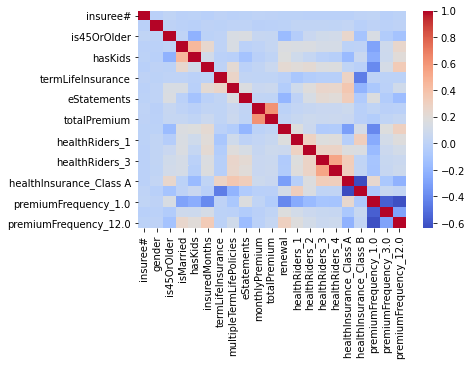

In [40]:
sns.heatmap(df.corr(), cmap="coolwarm")

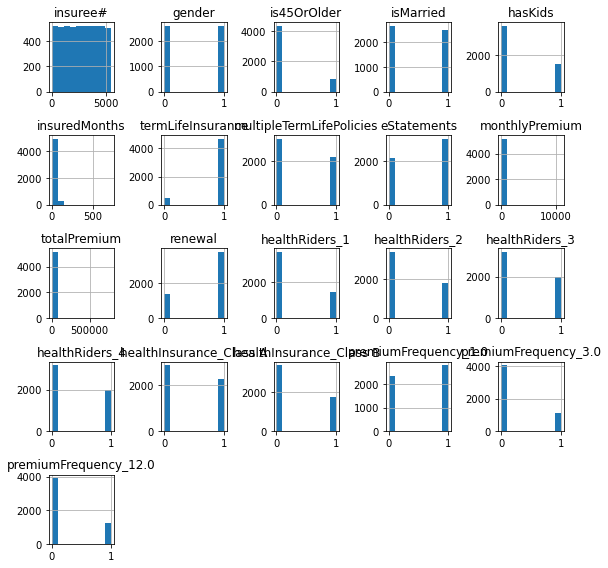

In [41]:
df.hist(figsize=(8,8))
plt.tight_layout()

In [42]:
df.skew()

insuree#                    -0.001746
gender                       0.011587
is45OrOlder                  1.818284
isMarried                    0.071108
hasKids                      0.879154
insuredMonths                8.678109
termLifeInsurance           -2.763662
multipleTermLifePolicies     0.325555
eStatements                 -0.347302
monthlyPremium              16.745560
totalPremium                20.509456
renewal                     -1.047058
healthRiders_1               0.963683
healthRiders_2               0.661411
healthRiders_3               0.494088
healthRiders_4               0.486501
healthInsurance_Class A      0.234086
healthInsurance_Class B      0.678625
premiumFrequency_1.0        -0.194012
premiumFrequency_3.0         1.435585
premiumFrequency_12.0        1.197234
dtype: float64

# Data preperation

In [43]:
# log transformation for non one hot encoded skewed data, skew() >1 or <-1
# will be applied to insuredMonths, monthlyPremium, totalPremium
# log(x+1) is used to avoid taking 0

df["lg_insuredMonths"] = np.log(df["insuredMonths"]+1)     
df["lg_monthlyPremium"] = np.log(df["monthlyPremium"])     
df["lg_totalPremium"] = np.log(df["totalPremium"]+1)     

In [44]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,eStatements,monthlyPremium,...,healthRiders_3,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B,premiumFrequency_1.0,premiumFrequency_3.0,premiumFrequency_12.0,lg_insuredMonths,lg_monthlyPremium,lg_totalPremium
0,1,1.0,0.0,1,1,23,1,0,1,19.65,...,0,0,0,0,0,0,1,3.178054,2.978077,6.114898
1,2,1.0,1.0,0,0,42,1,1,1,84.65,...,1,0,1,0,1,0,0,3.761200,4.438525,8.172546
2,3,1.0,0.0,1,0,72,1,0,0,19.40,...,0,0,0,0,0,0,1,4.290459,2.965273,7.311519
3,4,1.0,0.0,1,1,13,1,0,0,19.55,...,0,0,0,0,0,0,1,2.639057,2.972975,5.584623
4,5,1.0,0.0,0,0,37,1,1,0,100.30,...,1,1,1,0,1,0,0,3.637586,4.608166,8.172560


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5180 non-null   int64  
 1   gender                    5180 non-null   float64
 2   is45OrOlder               5180 non-null   float64
 3   isMarried                 5180 non-null   int64  
 4   hasKids                   5180 non-null   int64  
 5   insuredMonths             5180 non-null   int64  
 6   termLifeInsurance         5180 non-null   int64  
 7   multipleTermLifePolicies  5180 non-null   int64  
 8   eStatements               5180 non-null   int64  
 9   monthlyPremium            5180 non-null   float64
 10  totalPremium              5180 non-null   float64
 11  renewal                   5180 non-null   int64  
 12  healthRiders_1            5180 non-null   int64  
 13  healthRiders_2            5180 non-null   int64  
 14  healthRi

In [46]:
df.skew()

insuree#                    -0.001746
gender                       0.011587
is45OrOlder                  1.818284
isMarried                    0.071108
hasKids                      0.879154
insuredMonths                8.678109
termLifeInsurance           -2.763662
multipleTermLifePolicies     0.325555
eStatements                 -0.347302
monthlyPremium              16.745560
totalPremium                20.509456
renewal                     -1.047058
healthRiders_1               0.963683
healthRiders_2               0.661411
healthRiders_3               0.494088
healthRiders_4               0.486501
healthInsurance_Class A      0.234086
healthInsurance_Class B      0.678625
premiumFrequency_1.0        -0.194012
premiumFrequency_3.0         1.435585
premiumFrequency_12.0        1.197234
lg_insuredMonths            -0.679619
lg_monthlyPremium            1.138320
lg_totalPremium             -0.617368
dtype: float64

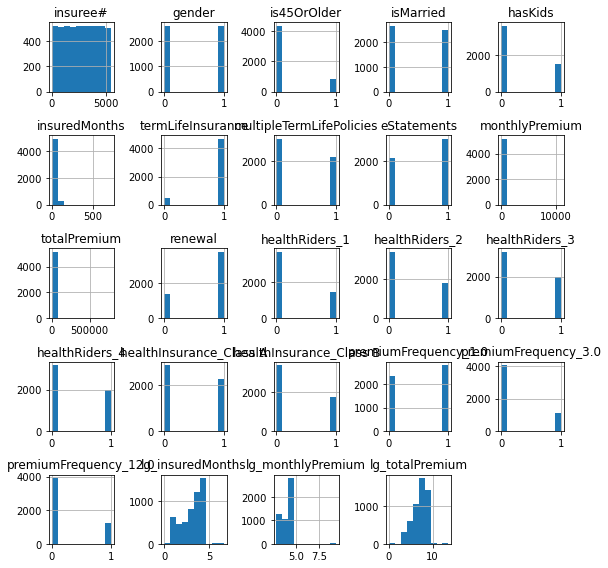

In [47]:
df.hist(figsize=(8,8))
plt.tight_layout()

In [48]:
#select columns to be used for analysis
df2 = df.drop(columns = ["insuree#", "insuredMonths", "monthlyPremium", "totalPremium"])
df2

,gender,is45OrOlder,isMarried,hasKids,termLifeInsurance,multipleTermLifePolicies,eStatements,renewal,healthRiders_1,healthRiders_2,healthRiders_3,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B,premiumFrequency_1.0,premiumFrequency_3.0,premiumFrequency_12.0,lg_insuredMonths,lg_monthlyPremium,lg_totalPremium
0,1.0,0.0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,3.178054,2.978077,6.114898
1,1.0,1.0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,3.761200,4.438525,8.172546
2,1.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,4.290459,2.965273,7.311519
3,1.0,0.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,2.639057,2.972975,5.584623
4,1.0,0.0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,3.637586,4.608166,8.172560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1.0,0.0,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,1.609438,4.453766,5.946206
5496,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1.386294,2.995732,3.924939
5497,0.0,0.0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,4.043051,4.393214,8.424749
5498,0.0,0.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,4.007333,3.015535,6.995400


In [49]:
#standardize columns to be used for the model
scaler = StandardScaler()
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled = pd.DataFrame(df_scaled, columns = list(df2))

In [50]:
df_scaled

,gender,is45OrOlder,isMarried,hasKids,termLifeInsurance,multipleTermLifePolicies,eStatements,renewal,healthRiders_1,healthRiders_2,healthRiders_3,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B,premiumFrequency_1.0,premiumFrequency_3.0,premiumFrequency_12.0,lg_insuredMonths,lg_monthlyPremium,lg_totalPremium
0,1.005808,-0.442439,1.036175,1.531748,0.323958,-0.850424,0.841356,0.605305,-0.62827,-0.722625,-0.783074,-0.785964,-0.889813,-0.716753,-1.101669,-0.513239,1.763834,0.109908,-1.548181,-0.518620
1,1.005808,2.260197,-0.965088,-0.652849,0.323958,1.175885,0.841356,-1.652060,-0.62827,-0.722625,1.277019,-0.785964,1.123831,-0.716753,0.907713,-0.513239,-0.566947,0.604068,0.561203,0.752018
2,1.005808,-0.442439,1.036175,-0.652849,0.323958,-0.850424,-1.188557,0.605305,-0.62827,-0.722625,-0.783074,-0.785964,-0.889813,-0.716753,-1.101669,-0.513239,1.763834,1.052564,-1.566675,0.220317
3,1.005808,-0.442439,1.036175,1.531748,0.323958,-0.850424,-1.188557,0.605305,-0.62827,-0.722625,-0.783074,-0.785964,-0.889813,-0.716753,-1.101669,-0.513239,1.763834,-0.346839,-1.555550,-0.846075
4,1.005808,-0.442439,-0.965088,-0.652849,0.323958,1.175885,-1.188557,0.605305,-0.62827,-0.722625,1.277019,1.272323,1.123831,-0.716753,0.907713,-0.513239,-0.566947,0.499317,0.806222,0.752026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,1.005808,-0.442439,1.036175,1.531748,0.323958,1.175885,0.841356,-1.652060,-0.62827,-0.722625,-0.783074,1.272323,1.123831,-0.716753,0.907713,-0.513239,-0.566947,-1.219342,0.583216,-0.622791
5176,-0.994225,-0.442439,1.036175,-0.652849,0.323958,-0.850424,-1.188557,0.605305,-0.62827,-0.722625,-0.783074,-0.785964,-0.889813,-0.716753,0.907713,-0.513239,-0.566947,-1.408434,-1.522681,-1.870963
5177,-0.994225,-0.442439,1.036175,-0.652849,0.323958,-0.850424,0.841356,0.605305,-0.62827,-0.722625,-0.783074,1.272323,1.123831,-0.716753,-1.101669,1.948409,-0.566947,0.842910,0.495758,0.907758
5178,-0.994225,-0.442439,1.036175,1.531748,0.323958,-0.850424,-1.188557,0.605305,-0.62827,-0.722625,-0.783074,-0.785964,-0.889813,-0.716753,-1.101669,-0.513239,1.763834,0.812642,-1.494080,0.025107


In [51]:
#mean is now 0 and standard deviation is 1 which will adjust for the difference in scale
round(df_scaled.describe())

,gender,is45OrOlder,isMarried,hasKids,termLifeInsurance,multipleTermLifePolicies,eStatements,renewal,healthRiders_1,healthRiders_2,healthRiders_3,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B,premiumFrequency_1.0,premiumFrequency_3.0,premiumFrequency_12.0,lg_insuredMonths,lg_monthlyPremium,lg_totalPremium
count,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0,5180.0
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-0.0,-1.0,-1.0,-3.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-2.0,-4.0
25%,-1.0,-0.0,-1.0,-1.0,0.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-0.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
75%,1.0,-0.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
max,1.0,2.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,8.0,4.0


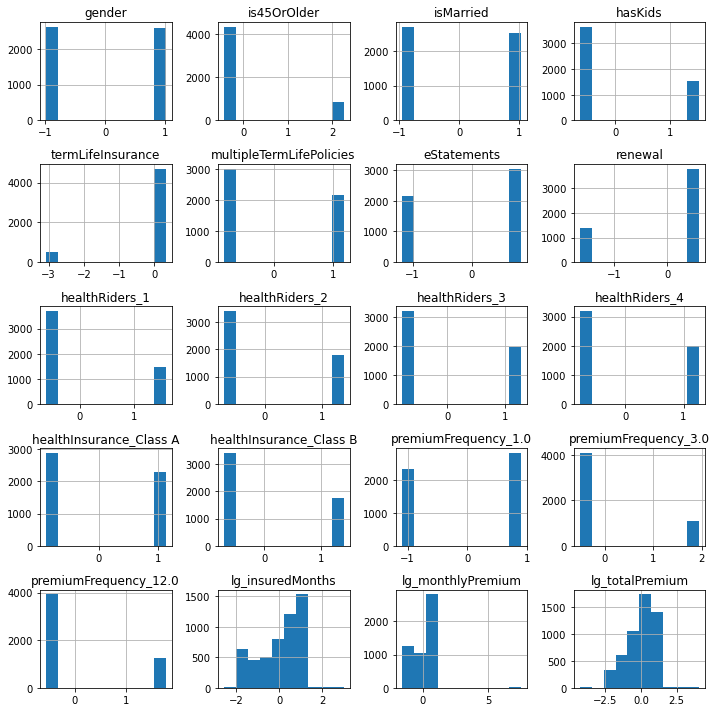

In [52]:
df_scaled.hist(figsize=(10,10))
plt.tight_layout()

# Model Building 

Which model did you use to gain insight into the insuree behaviour, and what are the determining factors for choosing this model?

The model chosen is K Means clustering. The company wants to find out more about their insurees and how they will renew based on different factors. K Means learns patterns from the different factors based on euclidean distance which will allow for relationships to be formed. This will allow for clusters, which are a collection of data points aggregated together because of certain similarities to be discovered and different insuree renewal behaviour can be identified from this. K Means aims to have points in the same cluster be close to each other and points from different clusters be far from each other.

Hence, the determining factor is that the company wants to find out more about their customer behavior, homogeneous groups that differ from one another can be identified and there is no assumption made about the likely relationships within the data. 

In [69]:
SSE = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_scaled)
    SSE.append(model.inertia_)

In [70]:
SSE

[103599.99999999997,
 88276.95643237633,
 78606.5723069653,
 72091.04969118375,
 67555.05898612003,
 63572.65163248513,
 60898.951735212875]

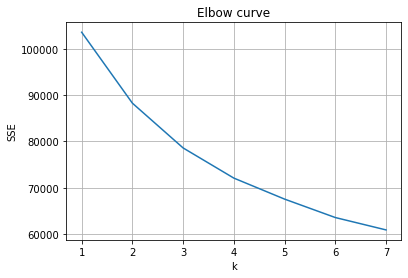

In [72]:
k = (range(1,8)) 
plt.title('Elbow curve') 
plt.xlabel('k') 
plt.ylabel('SSE') 
plt.grid(True) 
plt.plot(k, SSE) 
plt.show()
#K=3 seems to be the elbow curve

In [73]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df_scaled)

In [76]:
#model results
print("Attributes of the clustering solution:") 
print("SSE :", round(model.inertia_,2)) 
print("Num of iterations :" , model.n_iter_) 
print("Cluster centers :" , model.cluster_centers_)
print("Max iter:", model.max_iter)

Attributes of the clustering solution:
SSE : 78606.57
Num of iterations : 7
Cluster centers : [[ 3.09492575e-02  3.98947475e-01 -2.13670211e-01 -3.36837814e-01
   3.08942028e-01  2.96543348e-01  4.26436614e-01 -6.73868418e-01
  -2.88995276e-01 -5.22640222e-02  1.75711429e-01  1.69392215e-01
   1.07190720e+00 -6.67607225e-01  8.87493222e-01 -4.93112672e-01
  -5.62549010e-01 -3.45037305e-01  6.45064636e-01 -2.36549363e-04]
 [-3.30678781e-02 -2.62972555e-01 -1.68717063e-01  8.64541976e-02
  -1.91097914e-01 -4.83634862e-01 -4.03750766e-01  2.15568097e-01
  -3.61832746e-01 -5.07107846e-01 -6.30061530e-01 -6.27010868e-01
  -8.75946502e-01  2.12996696e-01  3.49712051e-02 -6.76483708e-02
   2.34872168e-02 -3.31701966e-01 -9.41490270e-01 -6.78821884e-01]
 [ 1.15720467e-02 -6.40355043e-02  4.38495456e-01  2.31092319e-01
  -6.59703058e-02  3.28661368e-01  9.17091144e-02  4.06680054e-01
   7.67571266e-01  7.15510628e-01  6.43245933e-01  6.45715783e-01
   4.91116200e-02  4.03643677e-01 -9.51965756e

# Interpreting Cluster Results 

In [78]:
print(model.labels_) 
df2['cluster'] = model.labels_

[1 0 1 ... 2 1 1]


In [79]:
df2

,gender,is45OrOlder,isMarried,hasKids,termLifeInsurance,multipleTermLifePolicies,eStatements,renewal,healthRiders_1,healthRiders_2,...,healthRiders_4,healthInsurance_Class A,healthInsurance_Class B,premiumFrequency_1.0,premiumFrequency_3.0,premiumFrequency_12.0,lg_insuredMonths,lg_monthlyPremium,lg_totalPremium,cluster
0,1.0,0.0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,1,3.178054,2.978077,6.114898,1
1,1.0,1.0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,3.761200,4.438525,8.172546,0
2,1.0,0.0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,4.290459,2.965273,7.311519,1
3,1.0,0.0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,2.639057,2.972975,5.584623,1
4,1.0,0.0,0,0,1,1,0,1,0,0,...,1,1,0,1,0,0,3.637586,4.608166,8.172560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1.0,0.0,1,1,1,1,1,0,0,0,...,1,1,0,1,0,0,1.609438,4.453766,5.946206,0
5496,0.0,0.0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1.386294,2.995732,3.924939,1
5497,0.0,0.0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,4.043051,4.393214,8.424749,2
5498,0.0,0.0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,4.007333,3.015535,6.995400,1


In [80]:
#clusters are relatively distributed
df2['cluster'].value_counts()

1    2033
0    1590
2    1557
Name: cluster, dtype: int64

In [82]:
model.cluster_centers_

array([[ 3.09492575e-02,  3.98947475e-01, -2.13670211e-01,
        -3.36837814e-01,  3.08942028e-01,  2.96543348e-01,
         4.26436614e-01, -6.73868418e-01, -2.88995276e-01,
        -5.22640222e-02,  1.75711429e-01,  1.69392215e-01,
         1.07190720e+00, -6.67607225e-01,  8.87493222e-01,
        -4.93112672e-01, -5.62549010e-01, -3.45037305e-01,
         6.45064636e-01, -2.36549363e-04],
       [-3.30678781e-02, -2.62972555e-01, -1.68717063e-01,
         8.64541976e-02, -1.91097914e-01, -4.83634862e-01,
        -4.03750766e-01,  2.15568097e-01, -3.61832746e-01,
        -5.07107846e-01, -6.30061530e-01, -6.27010868e-01,
        -8.75946502e-01,  2.12996696e-01,  3.49712051e-02,
        -6.76483708e-02,  2.34872168e-02, -3.31701966e-01,
        -9.41490270e-01, -6.78821884e-01],
       [ 1.15720467e-02, -6.40355043e-02,  4.38495456e-01,
         2.31092319e-01, -6.59703058e-02,  3.28661368e-01,
         9.17091144e-02,  4.06680054e-01,  7.67571266e-01,
         7.15510628e-01,  6.4

In [84]:
clust_mean = pd.DataFrame(model.cluster_centers_, columns=df_scaled.columns)

In [85]:
print(clust_mean)

     gender  is45OrOlder  isMarried   hasKids  termLifeInsurance  \
0  0.030949     0.398947  -0.213670 -0.336838           0.308942   
1 -0.033068    -0.262973  -0.168717  0.086454          -0.191098   
2  0.011572    -0.064036   0.438495  0.231092          -0.065970   

   multipleTermLifePolicies  eStatements   renewal  healthRiders_1  \
0                  0.296543     0.426437 -0.673868       -0.288995   
1                 -0.483635    -0.403751  0.215568       -0.361833   
2                  0.328661     0.091709  0.406680        0.767571   

   healthRiders_2  healthRiders_3  healthRiders_4  healthInsurance_Class A  \
0       -0.052264        0.175711        0.169392                 1.071907   
1       -0.507108       -0.630062       -0.627011                -0.875947   
2        0.715511        0.643246        0.645716                 0.049112   

   healthInsurance_Class B  premiumFrequency_1.0  premiumFrequency_3.0  \
0                -0.667607              0.887493           

<AxesSubplot:>

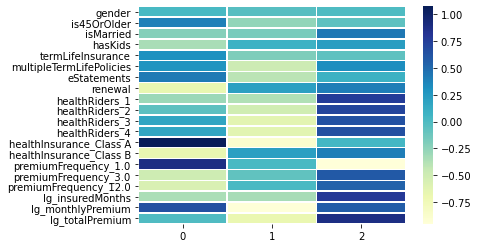

In [87]:
sns.heatmap(clust_mean.T,  linewidths=.5, cmap="YlGnBu")

### Results

There are three diffeent clusters identifed from the model. The number of clusters is chosen after using the elbow curve method. The cluster center is used to represent the average person in that cluster. This is due to the average showing the typical value of a person in each cluster.

The above cluster composition indicate that people tend to have different spending and renewal habits based on certain factors.
 
For instance, based on the centroids, Cluster 0 is characterized by people who are the oldest. They tend to have high life term insurance and multiple life term policies. Though they do sometimes sned on health rider insurance, they don't spend on it as much. However, they tend to be huge spenders in health insurance class A and do not spend on class B. This could be due to the policy being catered more towards older people. They also do not tend to renew their policies and tned to pay their premimum on a monthly basis. They have high monthly premiums and an average total premium. The high monthly premimum might have resulted in customers not renewing. Also, they tend to recieve alot of e statements and tend not to be married or have kids.
 
Cluster 1 is characterized by people who are the youngest. In general, they do not seem to purcchase any rider insurance and have a preference of health insurance class B over class A. They also do not tend to have a preference for their premimum frequency and have very low monthly and total premium amounts. However, they do renew quite often if they actually purchase a policy. Also, they tend to not recieve statements or be married but have a decent number of kids.  
 
Cluster 2 is characterized by people who are married and have kids. They spend the most on preimums, have the most total premiums and insured months. They do not have a preference on health rider but tend to have a lot of them. They have a slight tendency of class B health insurance over class A but still purchase a sizable amount of both. Though they do not have as muich termlife insurance and multiple life policies as people in cluster 1, they still purchase a decent amount. Lastly, they tend to renew very often and purchase at higher frequencies of 3 and 12 months while recieivng alot of estatements.   


### Why are the insurees not renewing and what are the most important factors?
Insurees might not be renewing if they do not have family or kids. Having kids and getting married is a commitment and the results seem to show that they would want to get insurance in case anything goes wrong. Costs do not seem to be a big factor as people who tend to renew have high monthly premiums. People who renew also tend to purchase premiums with longer frequency which could be due to having a partner and kids. 

Hence, the most important factors to renewing premimums are whether the insuree is married, has kids and if they purchase longer premium frequncy.
